<a href="https://colab.research.google.com/github/dhruvkalra71/NASA_Near-Earth-Object_Analysis/blob/main/NEOAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Near Earth Object Analysis

*   Analyze NASA's Near-Earth Objects dataset
*   Identify and Examine the Distribution of Hazardous Asteroids
*   Build Machine Learning Model for Classification
*   Evaluate Model Performance & Accuracy

In [67]:
%pip install kagglehub pandas matplotlib seaborn numpy scikit-learn

## Importing Libraries

In [68]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

## Load Dataset

In [69]:
file_path = "neo_v2.csv"

df = kagglehub.dataset_load(KaggleDatasetAdapter.PANDAS, "sameepvani/nasa-nearest-earth-objects", file_path)

Using Colab cache for faster access to the 'nasa-nearest-earth-objects' dataset.


## Inspecting Dataset

In [70]:
df.shape

(90836, 10)

In [71]:
df.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [72]:
df.tail()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
90831,3763337,(2016 VX1),0.026580,0.059435,52078.886692,1.230039e+07,Earth,False,25.00,False
90832,3837603,(2019 AD3),0.016771,0.037501,46114.605073,5.432121e+07,Earth,False,26.00,False
90833,54017201,(2020 JP3),0.031956,0.071456,7566.807732,2.840077e+07,Earth,False,24.60,False
90834,54115824,(2021 CN5),0.007321,0.016370,69199.154484,6.869206e+07,Earth,False,27.80,False
90835,54205447,(2021 TW7),0.039862,0.089133,27024.455553,5.977213e+07,Earth,False,24.12,False


## Data Cleaning

### Data Type Check

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


### Missing Value Check

In [74]:
df.isnull().sum()

,0
id,0
name,0
est_diameter_min,0
est_diameter_max,0
relative_velocity,0
miss_distance,0
orbiting_body,0
sentry_object,0
absolute_magnitude,0
hazardous,0


### Statistics for Numerical Data

In [75]:
df.describe()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,9.083600e+04,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.000000
mean,1.438288e+07,0.127432,0.284947,48066.918918,3.706655e+07,23.527103
std,2.087202e+07,0.298511,0.667491,25293.296961,2.235204e+07,2.894086
min,2.000433e+06,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,3.448110e+06,0.019256,0.043057,28619.020645,1.721082e+07,21.340000
50%,3.748362e+06,0.048368,0.108153,44190.117890,3.784658e+07,23.700000
75%,3.884023e+06,0.143402,0.320656,62923.604633,5.654900e+07,25.700000
max,5.427591e+07,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


### Duplicate Value Check

In [76]:
duplicate_rows = df.duplicated().sum()
print(duplicate_rows)

0


## Data Pre-processing

### Dropping Irrelevant Features

In [77]:
df = df.drop(['id', 'name','orbiting_body', 'sentry_object'], axis = 1)
df

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,1.198271,2.679415,13569.249224,5.483974e+07,16.73,False
1,0.265800,0.594347,73588.726663,6.143813e+07,20.00,True
2,0.722030,1.614507,114258.692129,4.979872e+07,17.83,False
3,0.096506,0.215794,24764.303138,2.543497e+07,22.20,False
4,0.255009,0.570217,42737.733765,4.627557e+07,20.09,True
...,...,...,...,...,...,...
90831,0.026580,0.059435,52078.886692,1.230039e+07,25.00,False
90832,0.016771,0.037501,46114.605073,5.432121e+07,26.00,False
90833,0.031956,0.071456,7566.807732,2.840077e+07,24.60,False
90834,0.007321,0.016370,69199.154484,6.869206e+07,27.80,False


### Handling Categorical Data

In [78]:
print(df['hazardous'].value_counts())

hazardous
False    81996
True      8840
Name: count, dtype: int64


In [79]:
df['hazardous'] = df['hazardous'].astype(int)
display(df['hazardous'].head())

,hazardous
0,0
1,1
2,0
3,0
4,1


### Feature Engineering

In [80]:
df['velocity_to_miss_distance_ratio'] = df['relative_velocity'] / df['miss_distance']
display(df.head())

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous,velocity_to_miss_distance_ratio
0,1.198271,2.679415,13569.249224,5.483974e+07,16.73,0,0.000247
1,0.265800,0.594347,73588.726663,6.143813e+07,20.00,1,0.001198
2,0.722030,1.614507,114258.692129,4.979872e+07,17.83,0,0.002294
3,0.096506,0.215794,24764.303138,2.543497e+07,22.20,0,0.000974
4,0.255009,0.570217,42737.733765,4.627557e+07,20.09,1,0.000924


In [81]:
df['average_diameter'] = (df['est_diameter_min'] + df['est_diameter_max']) / 2
display(df.head())

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous,velocity_to_miss_distance_ratio,average_diameter
0,1.198271,2.679415,13569.249224,5.483974e+07,16.73,0,0.000247,1.938843
1,0.265800,0.594347,73588.726663,6.143813e+07,20.00,1,0.001198,0.430073
2,0.722030,1.614507,114258.692129,4.979872e+07,17.83,0,0.002294,1.168268
3,0.096506,0.215794,24764.303138,2.543497e+07,22.20,0,0.000974,0.156150
4,0.255009,0.570217,42737.733765,4.627557e+07,20.09,1,0.000924,0.412613


## Data Visualization

In [82]:
numeric_df = ["relative_velocity","miss_distance","absolute_magnitude", "average_diameter", "velocity_to_miss_distance_ratio"]

### Distribution of Numerical Features

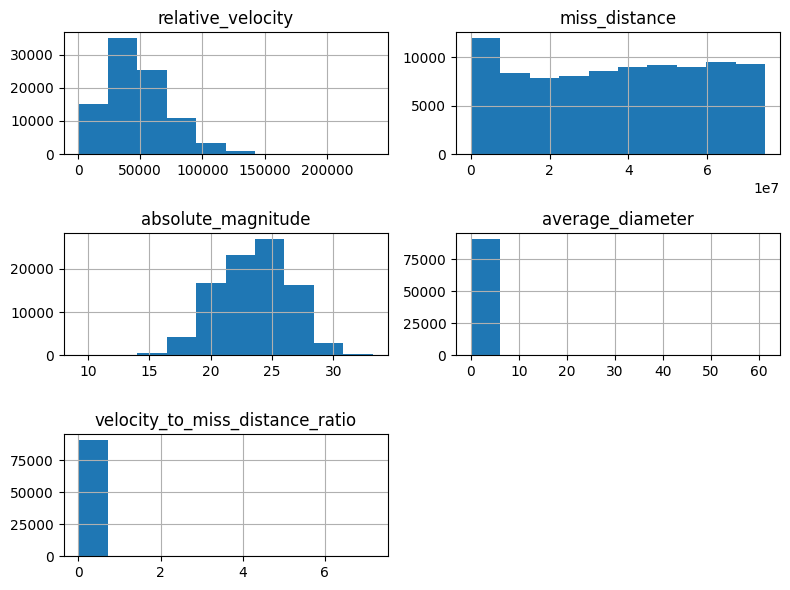

In [83]:
df[numeric_df].hist(figsize=(8, 6))
plt.tight_layout()
plt.show()

### Pairwise bivariate distributions

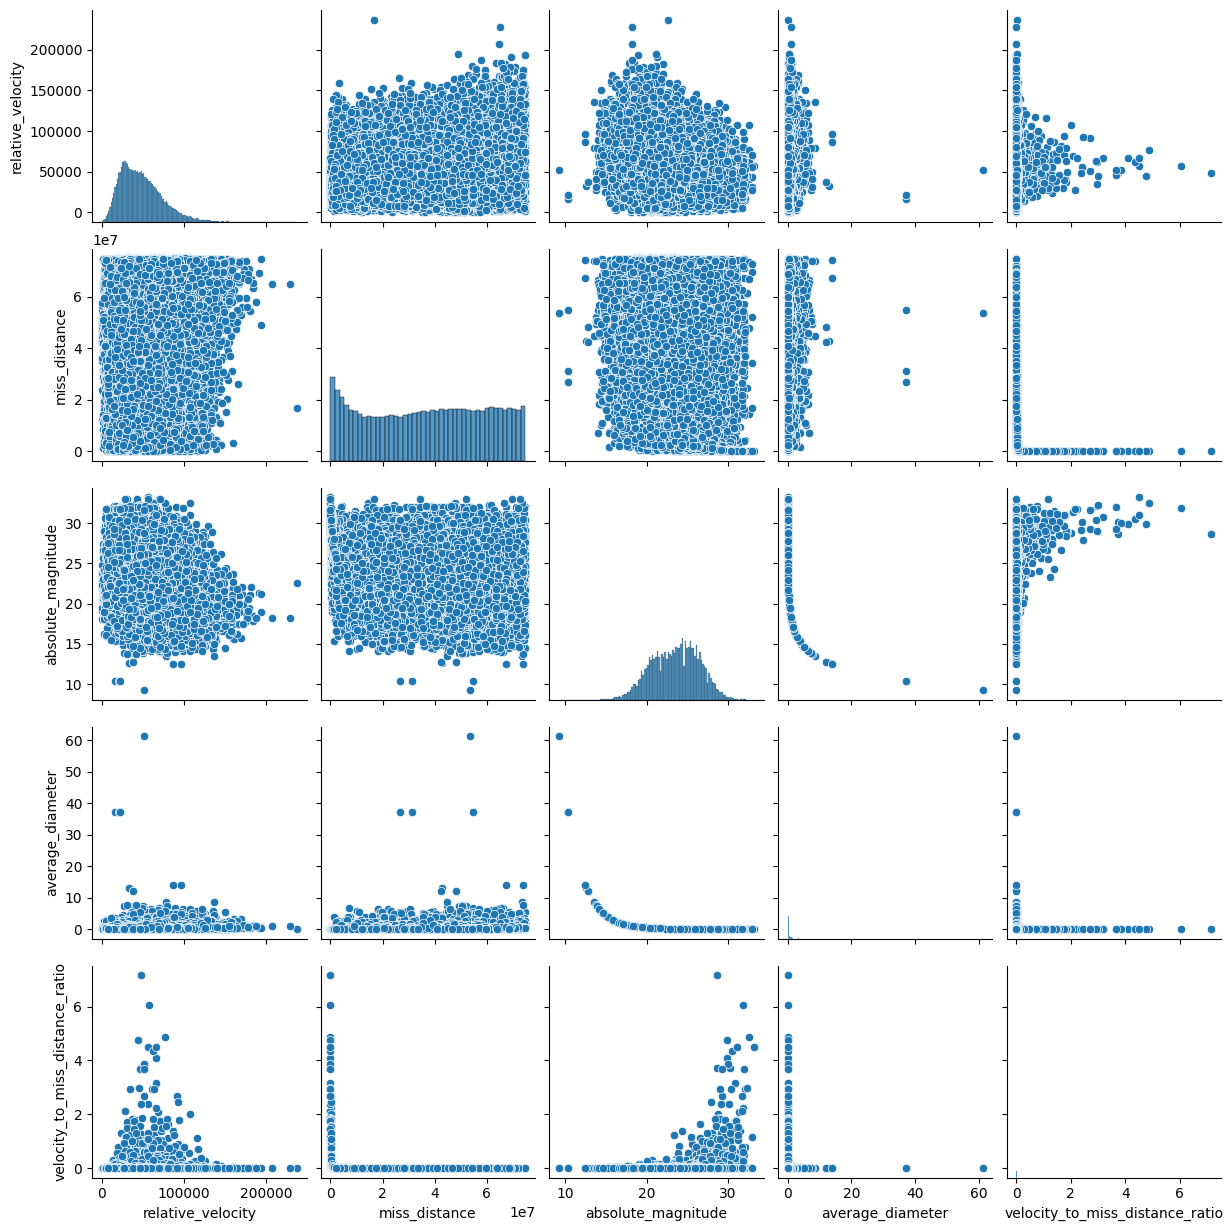

In [84]:
fig= sns.pairplot(df[numeric_df])

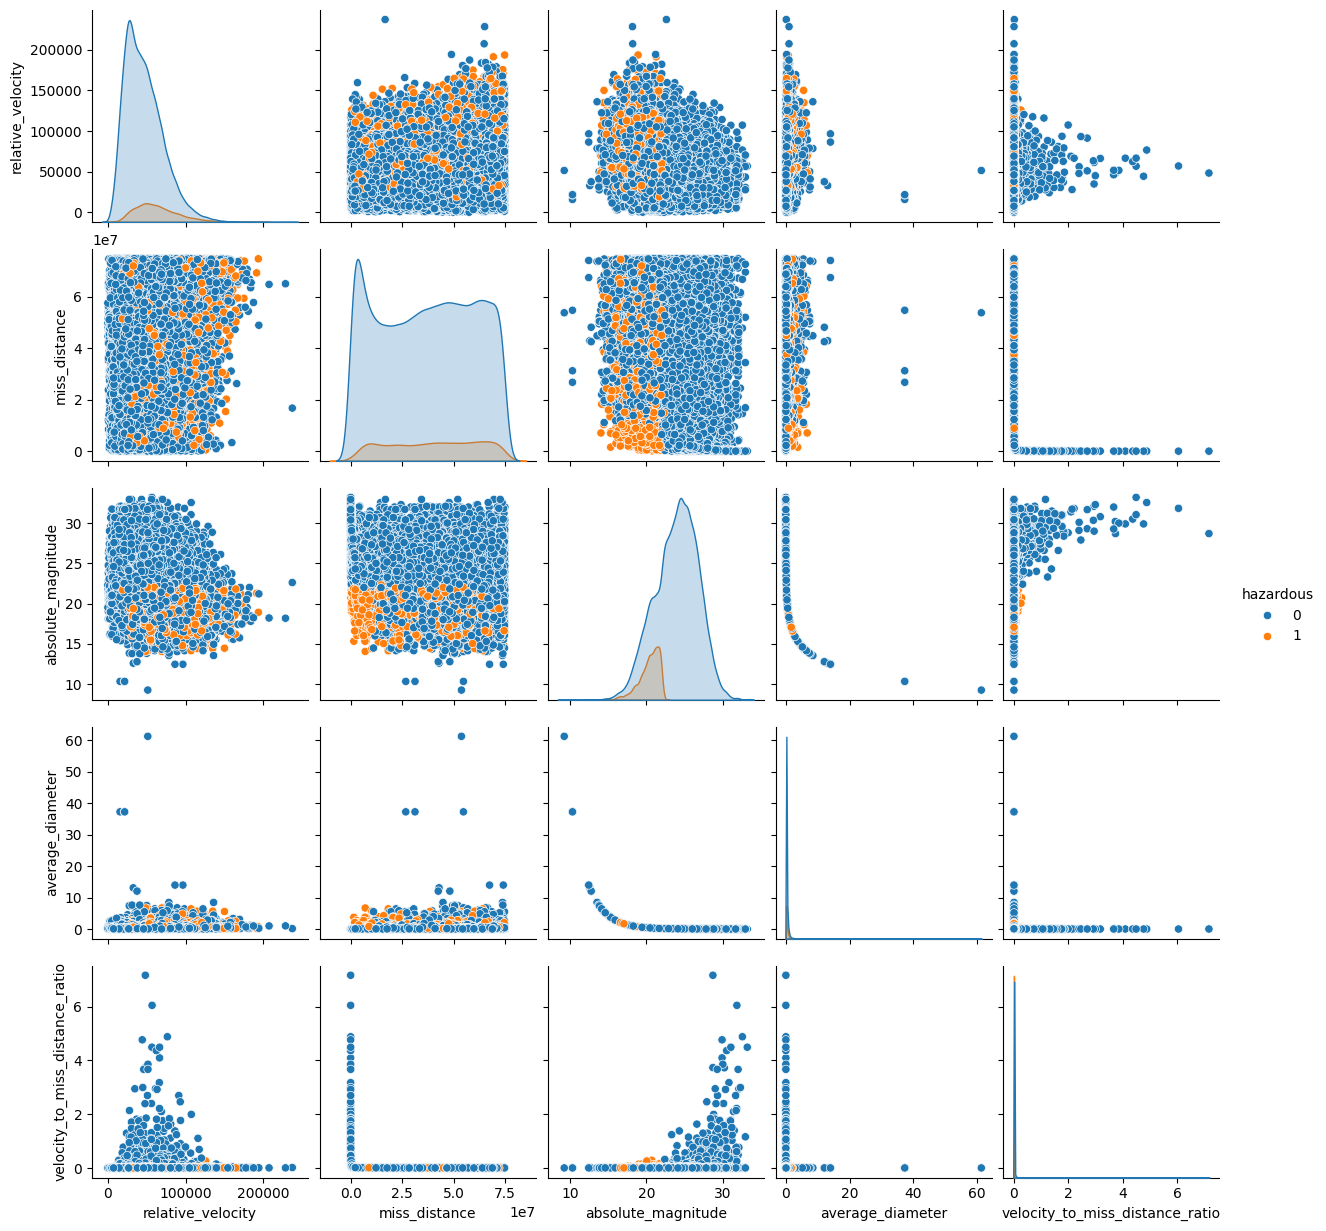

In [85]:
fig= sns.pairplot(df[numeric_df+['hazardous']],hue = 'hazardous')

### Correlation Heatmap

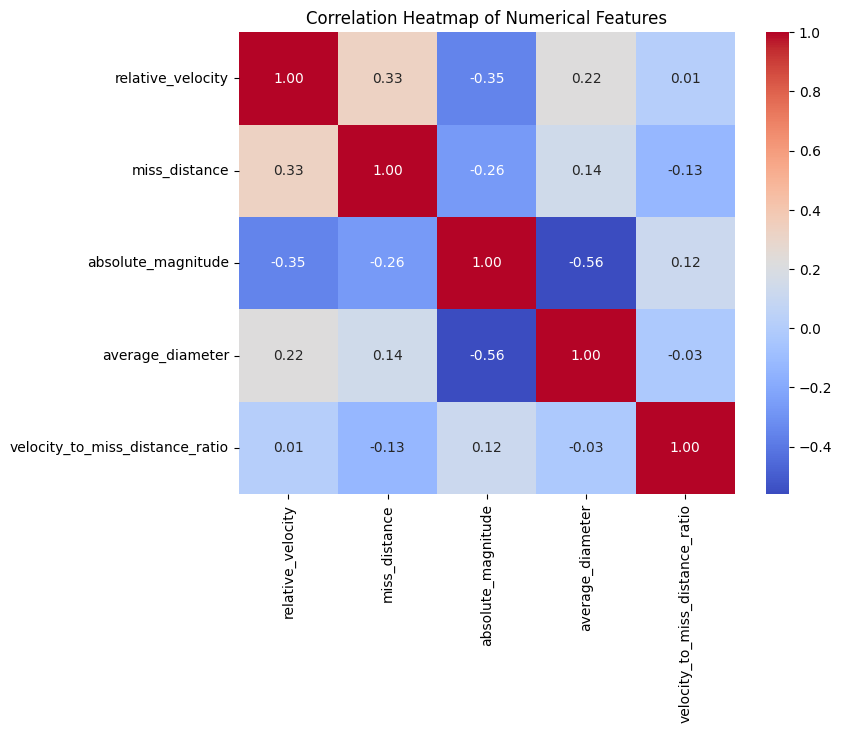

In [86]:
correlation_matrix = df[numeric_df].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

### Target Variable Distribution

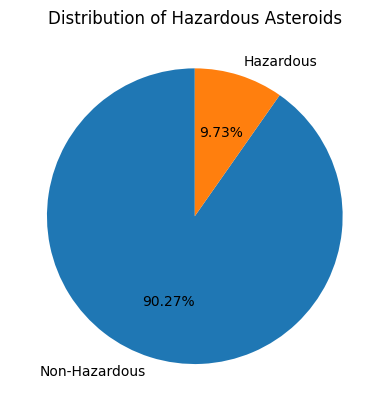

In [87]:
hazardous_counts = df['hazardous'].value_counts()
plt.pie(hazardous_counts, labels = ["Non-Hazardous", "Hazardous"], autopct='%1.2f%%', startangle=90)
plt.title('Distribution of Hazardous Asteroids')
plt.show()

## Dataset Splitting for Model Training and Testing

In [88]:
x = df.drop(["est_diameter_min","est_diameter_max", "hazardous"], axis = 1)

In [89]:
y = df['hazardous']

In [90]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

## Model Training

### KNN Model

In [91]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

### Random Forest Model

In [92]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

### Decision Tree Model

In [93]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

## Performance Evaluation

### KNN Model

In [94]:
knn_predictions = knn_model.predict(X_test)
knn_accuracy = round(accuracy_score(y_test, knn_predictions) * 100, 3)
print("KNN Accuracy:", knn_accuracy)

KNN Accuracy: 89.057


### Random Forest Model

In [95]:
rf_predictions = rf_model.predict(X_test)
rf_accuracy = round(accuracy_score(y_test, rf_predictions) * 100, 3)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 91.475


### Decision Tree

In [96]:
dt_predictions = dt_model.predict(X_test)
dt_accuracy = round(accuracy_score(y_test, dt_predictions) * 100, 3)
print("Decision Tree Accuracy:", dt_accuracy)

Decision Tree Accuracy: 89.427


### Final Result

In [97]:
models = pd.DataFrame({
    'Model': ['KNN', 'Random Forest', 'Decision Tree'],
    'Accuracy': [knn_accuracy, rf_accuracy, dt_accuracy]
})

models.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
1,Random Forest,91.475
2,Decision Tree,89.427
0,KNN,89.057
